In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Find the most recent date in the data set.

engine.execute('SELECT max(date) FROM measurement').fetchall()


[('2017-08-23',)]

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.


# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").\
    filter(measurement.date <= "2017-08-23").all()

In [20]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation).set_index('date')


In [21]:
# Rename the column
precipitation_df = precipitation_df.rename(columns={'prcp':'precipitation'})

In [22]:
# Sort the dataframe by date
precipitation_df=precipitation_df.sort_values(by='date').dropna()
precipitation_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


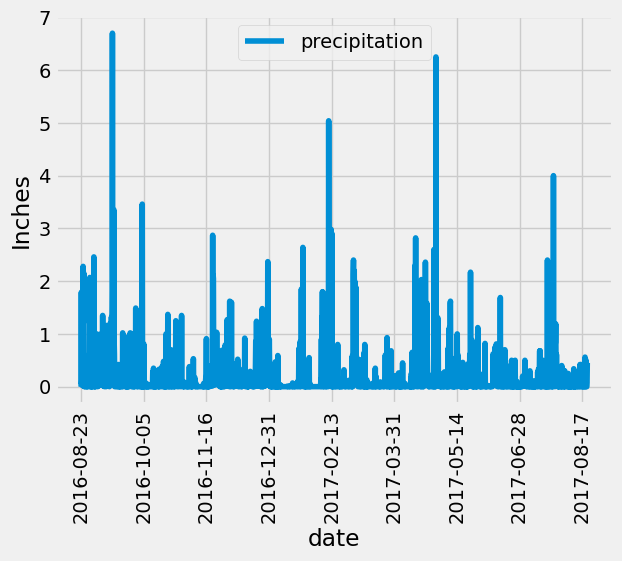

In [45]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=45, ylabel='Inches')
plt.xticks(rotation="vertical")


#plt.savefig("Precipitation analysis.png")
plt.show()


In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

# pandas dataframe

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number of stations in the dataset?
station_count = session.query(Station.id).count() 
station_count


9

In [52]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_activity = session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == station_number).all()



[(54.0, 85.0, 71.66378066378067)]

In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

## Choose the station with the highest number of temperature observations.
highest_temp_stat = station_activity[0][0]

results = session.query(measurement.date, measurement.tobs).\
                        filter(measurement.date >= "2016-08-23").\
                        filter(measurement.date <= "2017-08-23").\
                        filter(measurement.station == highest_temp_stat).all()



In [55]:
## convert to dataframe
results_df = pd.DataFrame(results)


<Axes: ylabel='Frequency'>

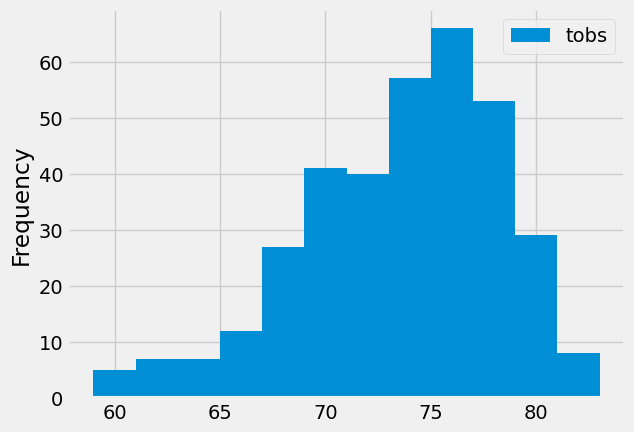

In [76]:
## historgram 
results_df.plot.hist(bins=12)

# Close Session

In [77]:
# Close Session
session.close()